In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [3]:
with open('train_in.csv', 'r') as file:
    traindata = np.loadtxt(file, dtype=float, delimiter=',')

with open('train_out.csv', 'r') as file:
    trainlabels = np.loadtxt(file, dtype=int, delimiter=',')

In [4]:
centers = np.zeros((10, 256))

for digit in range(10):
    images = traindata[trainlabels==digit]
    center = np.mean(images, axis=0)
    centers[digit, :] = center

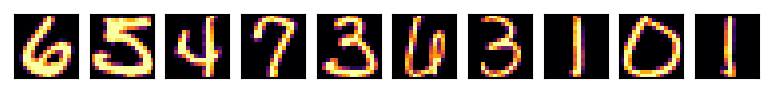

In [5]:
images = traindata[:11]
fig, axes = plt.subplots(1,10)

for im, ax in zip(images, axes):
    ax.imshow(im.reshape(16,16))
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])


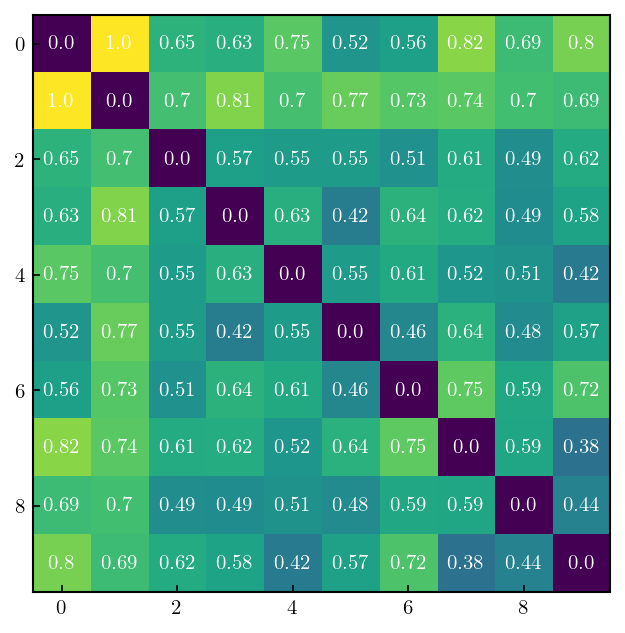

In [6]:
distance_matrix = np.zeros((10,10))
for (i,j), _ in np.ndenumerate(distance_matrix):
    distance_matrix[i,j] = np.linalg.norm(centers[i] - centers[j])

distance_matrix /= np.max(distance_matrix)
# print(distance_matrix)
fig, ax = plt.subplots(1,1, figsize=[5,5], dpi=150)
ax.imshow(distance_matrix, cmap='viridis')

for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(distance_matrix[i, j],2),
                       ha="center", va="center", color="w")
ax.grid(False)
plt.show()

We see that (7,9), (4,9), and (3,5) are most difficult to separate, as their distances are lowest.

[0.19313806 0.0922871 ]


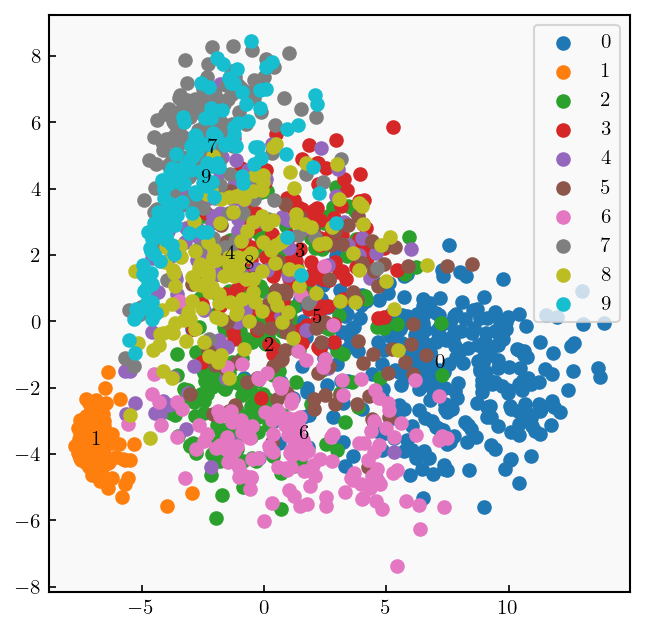

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fit = pca.fit_transform(traindata)
print(pca.explained_variance_ratio_)
fig, ax = plt.subplots(1,1, figsize=[5,5], dpi=150)


for digit in range(10):
    # images = traindata[trainlabels==digit]
    plotfit = fit[trainlabels==digit]
    ax.scatter(plotfit[:,0], plotfit[:,1], label=str(digit), )
    ax.text(s=str(digit), x=np.mean(plotfit[:,0]), y=np.mean(plotfit[:,1]),  zorder=10)

ax.legend()
ax.grid(False)
plt.show()
# evr = fit.explained_variance_

/home/jasper/environments/deeplearning/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


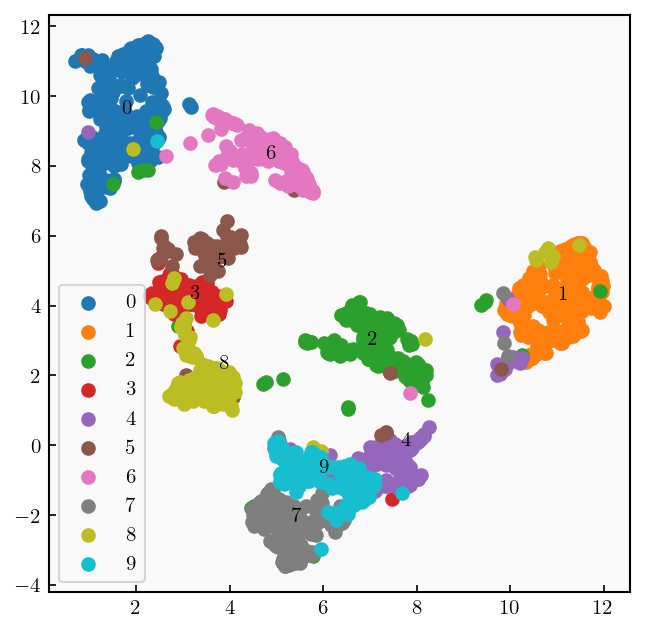

In [8]:
import umap

pca = umap.UMAP(n_components=2)
fit = pca.fit_transform(traindata)
fig, ax = plt.subplots(1,1, figsize=[5,5], dpi=150)


for digit in range(10):
    plotfit = fit[trainlabels==digit]
    ax.scatter(plotfit[:,0], plotfit[:,1], label=str(digit), )
    ax.text(s=str(digit), x=np.mean(plotfit[:,0]), y=np.mean(plotfit[:,1]),  zorder=10)

ax.legend()
ax.grid(False)
plt.show()

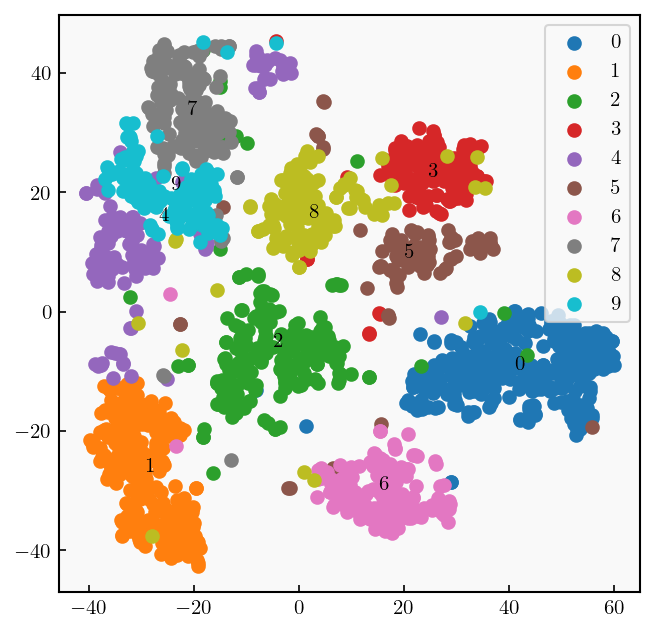

In [9]:
from sklearn.manifold import TSNE


pca = TSNE(n_components=2)
fit = pca.fit_transform(traindata)
fig, ax = plt.subplots(1,1, figsize=[5,5], dpi=150)


for digit in range(10):
    plotfit = fit[trainlabels==digit]
    ax.scatter(plotfit[:,0], plotfit[:,1], label=str(digit), )
    ax.text(s=str(digit), x=np.mean(plotfit[:,0]), y=np.mean(plotfit[:,1]),  zorder=10)

ax.legend()
ax.grid(False)
plt.show()

In [10]:
# with open('train_in.csv', 'r') as file:
    # testdata = np.loadtxt(file, dtype=float, delimiter=',')

# with open('train_out.csv', 'r') as file:
    # testlabels = np.loadtxt(file, dtype=int, delimiter=',')

testlabels = np.genfromtxt('test_out.csv', delimiter=',')
testdata = np.genfromtxt('test_in.csv', delimiter=',')

In [11]:
predictions_nmc = testlabels.copy()

number_correct = 0
for i, image in enumerate(testdata):
    predictions_nmc[i] = np.argmin([np.linalg.norm(image - center) for center in centers])
    if predictions_nmc[i] == testlabels[i]:
        number_correct += 1

correct_ratio = np.count_nonzero(testlabels==predictions_nmc)/len(testlabels)
print(f"correct: {correct_ratio:.2%}")

correct: 80.40%


In [12]:
from sklearn.neighbors import KNeighborsClassifier

def get_ratio(n_neighbors):
    nbors = KNeighborsClassifier(n_neighbors=n_neighbors)
    nbors.fit(traindata, trainlabels)

    predictions = nbors.predict(testdata)

    return np.count_nonzero(predictions == testlabels)/len(predictions)


for n in range(1,10):
    print(f"{n}: {get_ratio(n_neighbors=n):.2%}")



1: 91.50%
2: 89.80%
3: 91.40%
4: 90.20%
5: 90.80%
6: 90.90%
7: 90.20%
8: 90.20%
9: 89.50%


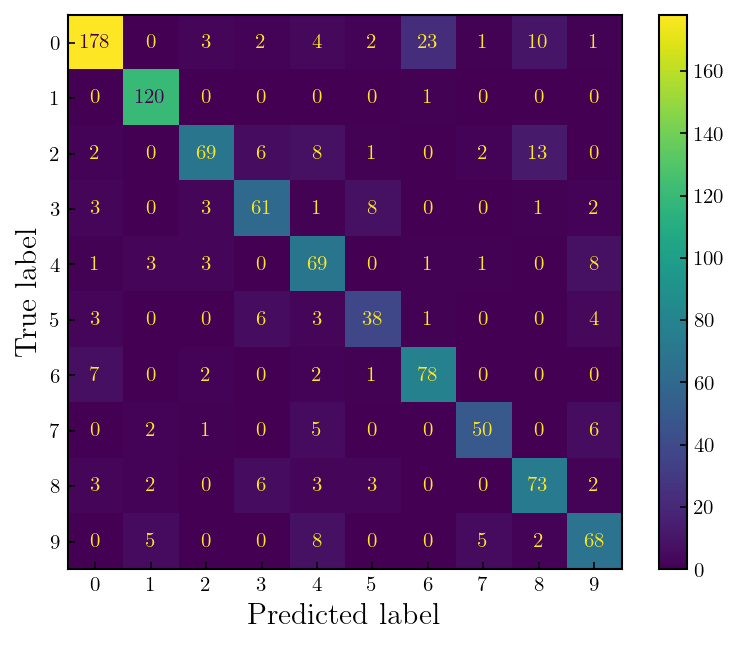

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

nbors = KNeighborsClassifier(n_neighbors=1)
nbors.fit(traindata, trainlabels)

predictions_knn = nbors.predict(testdata)

cm_nmc = confusion_matrix(testlabels, predictions_nmc, )
cm_knn = confusion_matrix(testlabels, predictions_knn, )



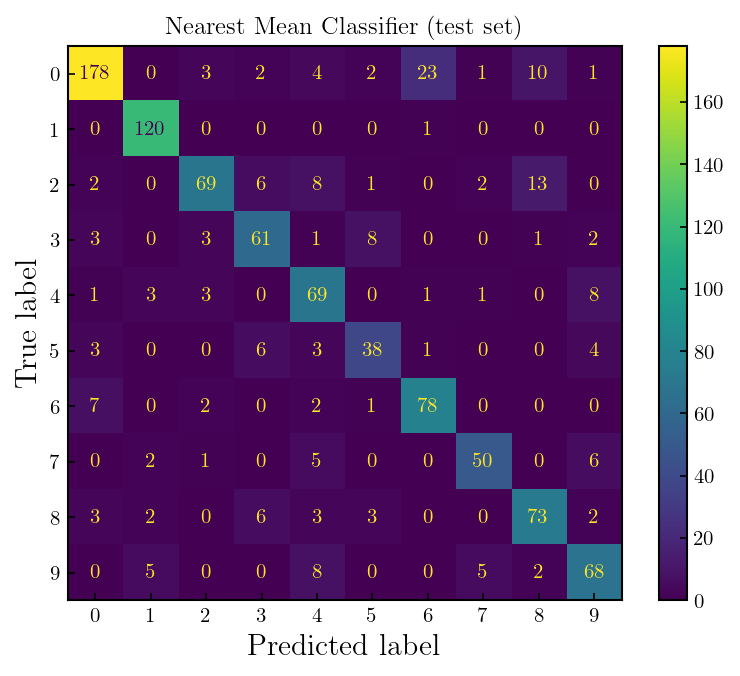

In [15]:
dsp = ConfusionMatrixDisplay(cm_nmc)
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=[8,6], dpi=150)
# ax1.imshow(cm_nmc)
# ax2.imshow(cm_knn)
dsp.plot()
plt.title("Nearest Mean Classifier (test set)")
plt.show()


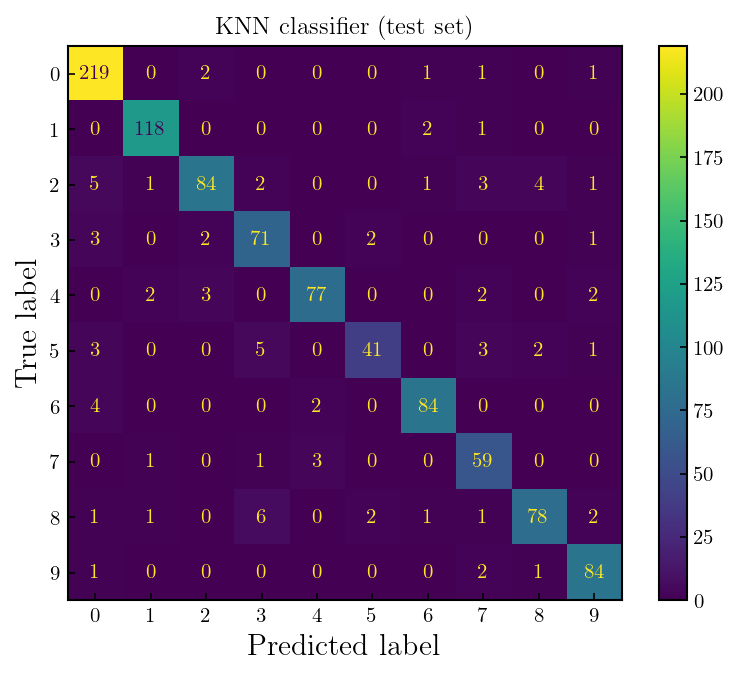

In [14]:
dsp = ConfusionMatrixDisplay(cm_knn)
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=[8,6], dpi=150)
# ax1.imshow(cm_nmc)
# ax2.imshow(cm_knn)
dsp.plot()
plt.title("KNN classifier (test set)")
plt.show()
